<a href="https://colab.research.google.com/github/Exper626/Census-Income-ML/blob/main/Census_Income_Unknown_replacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("dark_background")
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

load the data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
Y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

Get an idea on the dataset

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
Y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


Check for missing values

In [ ]:
missing_value = X.isnull().sum()
print(missing_value)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64


In [ ]:
Y_missing = Y.isnull().sum()
print(Y_missing)

income    0
dtype: int64


Fix the missing values

In [ ]:
columns_to_fill = ['workclass', 'occupation', 'native-country']

for column in columns_to_fill:
  X[column].fillna("Unknown", inplace=True)
  print("Filled Unknown")

Filled Unknown
Filled Unknown
Filled Unknown


In [ ]:
for column in X.columns:
  unique_values = X[column].unique()
  print(f"{column} : {unique_values} \n")

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' 'Unknown'] 

fnlwgt : [ 77516  83311 215646 ... 173449  89686 350977] 

education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-i

In [ ]:
Y['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

fixing Feature column by replacing "?" with "Unknown"

In [ ]:
X.replace("?", "Unknown", inplace=True)
print("Done replacing")

Done replacing


Fix the income column by removing full stops

In [ ]:
Y.loc[:, 'income'].replace('<=50K.','<=50K', regex=True, inplace=True)
Y.loc[:, 'income'].replace('>50K.','>50K', regex=True, inplace=True)

Check for duplicates

In [ ]:
# Concatenating X and Y into a single DataFrame for duplicate detection
concat_data = pd.concat([X, Y], axis=1)
shape1 = concat_data.shape
print(shape1)

# Concatenate all columns into a single column
merged_column = concat_data.apply(lambda row: ','.join(row.values.astype(str)), axis=1)


# Check for duplicates in the merged column
duplicates = merged_column[merged_column.duplicated()]

# Print duplicate rows if any
if len(duplicates) > 0:
    print("Duplicate rows found:")
    print(duplicates)

    # Count the number of duplicates
    num_duplicates = len(duplicates)
    print(f"Total duplicate rows found: {num_duplicates}")

    # Drop duplicate rows from X and Y
    duplicate_indices = merged_column[merged_column.duplicated()].index
    X = X.drop(duplicate_indices)
    Y = Y.drop(duplicate_indices)
    print("Duplicate rows dropped from X and Y.")
else:
    print("No duplicate rows found.")


(48842, 15)
Duplicate rows found:
4881     25,Private,308144,Bachelors,13,Never-married,C...
5104     90,Private,52386,Some-college,10,Never-married...
9171     21,Private,250051,Some-college,10,Never-marrie...
11631    20,Private,107658,Some-college,10,Never-marrie...
13084    25,Private,195994,1st-4th,2,Never-married,Priv...
15059    21,Private,243368,Preschool,1,Never-married,Fa...
17040    46,Private,173243,HS-grad,9,Married-civ-spouse...
18555    30,Private,144593,HS-grad,9,Never-married,Othe...
18698    19,Private,97261,HS-grad,9,Never-married,Farmi...
21318    19,Private,138153,Some-college,10,Never-marrie...
21490    19,Private,146679,Some-college,10,Never-marrie...
21875    49,Private,31267,7th-8th,4,Married-civ-spouse,...
22300    25,Private,195994,1st-4th,2,Never-married,Priv...
22367    44,Private,367749,Bachelors,13,Never-married,P...
22494    49,Self-emp-not-inc,43479,Some-college,10,Marr...
25872    23,Private,240137,5th-6th,3,Never-married,Hand...
26313    28,Private,27

In [ ]:
final_data = pd.concat([X, Y], axis=1)

merged data frame

It is clearly observed that 'fnlwgt' and 'education-num' is unnecessary

In [ ]:
final_data.drop(columns='fnlwgt', inplace=True)
final_data.drop(columns='education-num', inplace=True)

In [ ]:
final_data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Unknown,HS-grad,Widowed,Unknown,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
final_data.shape

(48790, 13)

In [ ]:
final_data.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1080.217688,87.595573,40.425886
std,13.708493,7455.905921,403.209129,12.392729
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


General Analysis

In [ ]:
"""# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers"""

'# Function to detect outliers using IQR\ndef detect_outliers_iqr(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]\n    return outliers'

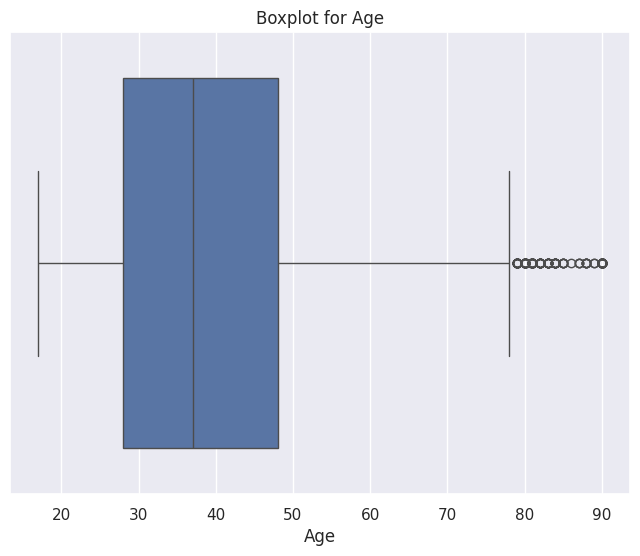

In [ ]:
# boxplot for age
plt.figure(figsize=(8,6))
sns.boxplot(x=final_data['age'])

plt.title('Boxplot for Age')
plt.xlabel('Age')

plt.show()

Univariate Analysis

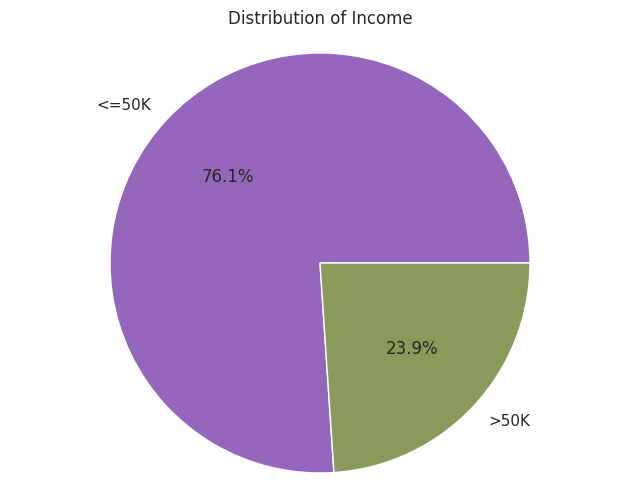

In [ ]:
income_counts = final_data['income'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', colors=['#9467bd', '#8a9a5b'])
plt.title('Distribution of Income')
plt.axis('equal')
plt.show()

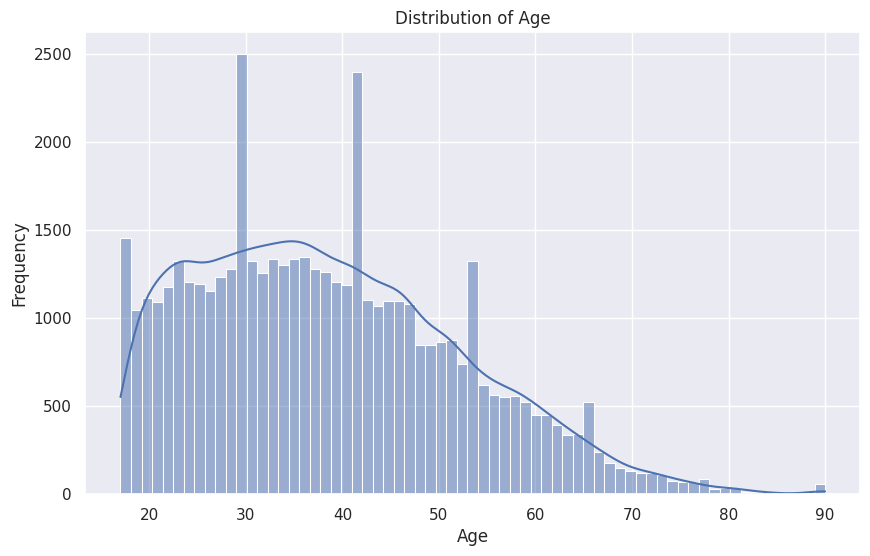

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(X['age'], kde=True, palette='Purples_d')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

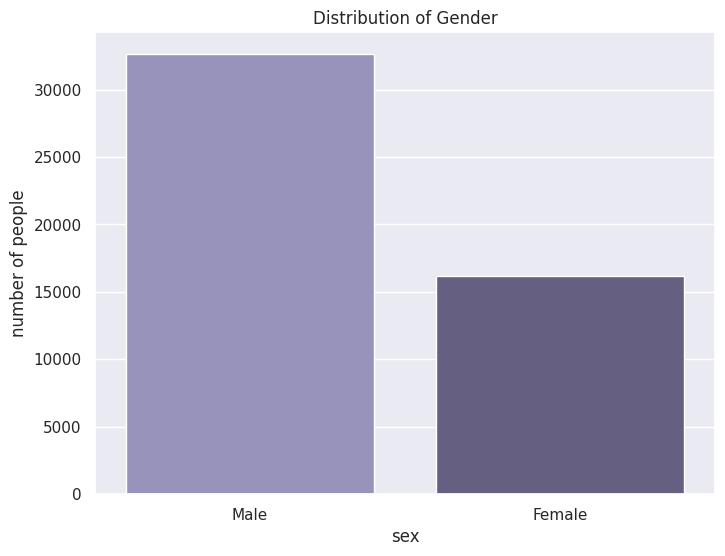

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=final_data, palette='Purples_d')
plt.title('Distribution of Gender')
plt.xlabel('sex')
plt.ylabel('number of people')
plt.show()

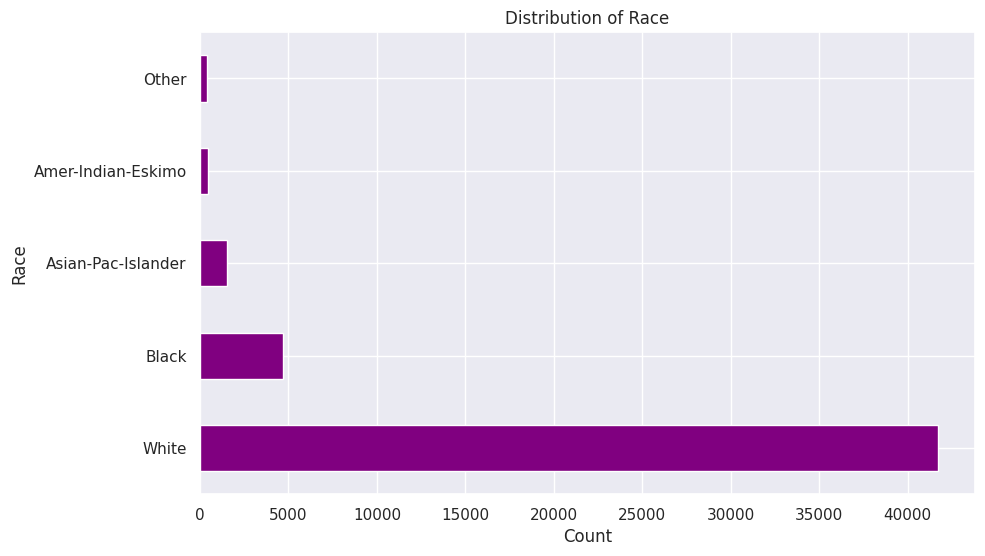

In [ ]:
race_counts = final_data['race'].value_counts()
plt.figure(figsize=(10, 6))
race_counts.plot(kind='barh', color='Purple')
plt.title('Distribution of Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

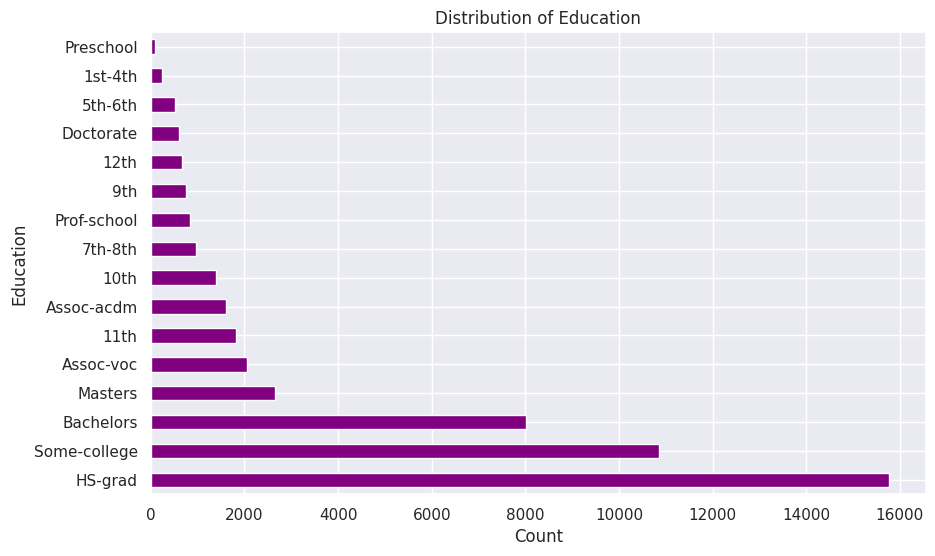

In [ ]:
ed_count = final_data['education'].value_counts()
plt.figure(figsize=(10, 6))
ed_count.plot(kind='barh', color='Purple')
plt.title('Distribution of Education')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

Bivariate analysis

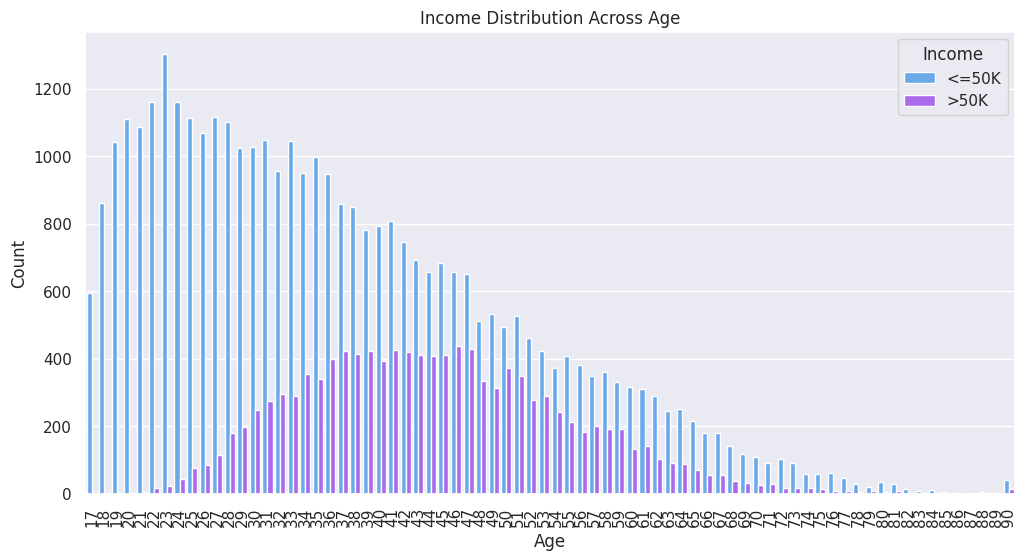

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='income', data=pd.concat([final_data['age'], final_data['income']], axis=1), palette='cool')
plt.title('Income Distribution Across Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=90)
plt.show()

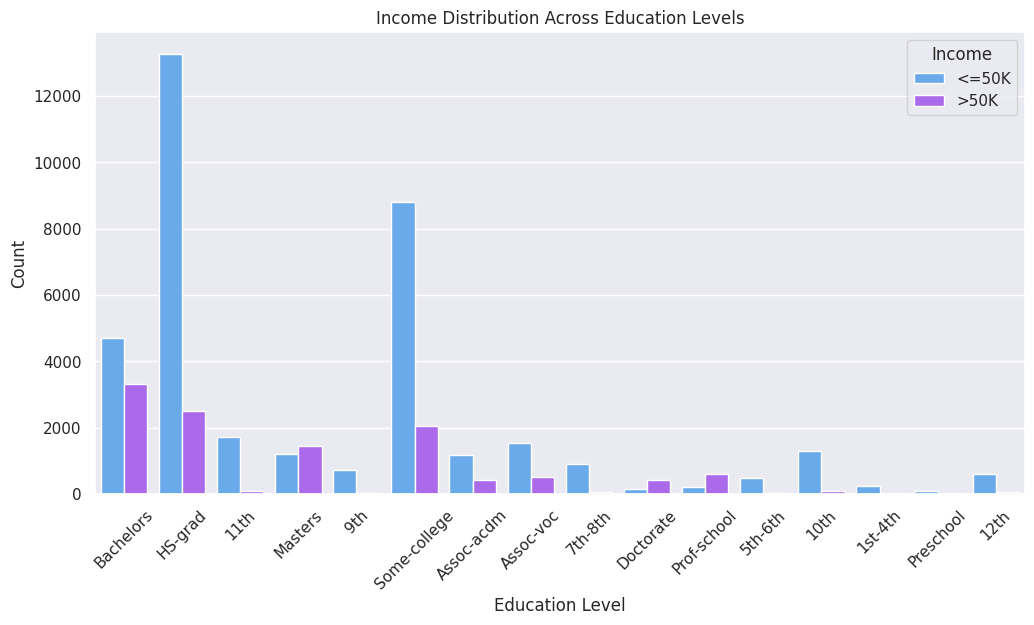

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=pd.concat([final_data['education'], final_data['income']], axis=1), palette='cool')
plt.title('Income Distribution Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45)
plt.show()

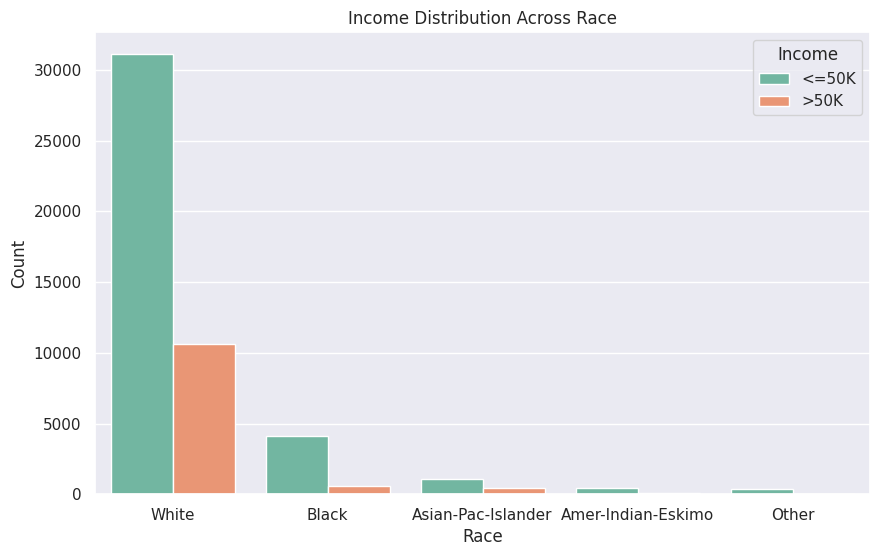

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='income', data=pd.concat([final_data['race'], final_data['income']], axis=1), palette='Set2')
plt.title('Income Distribution Across Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()

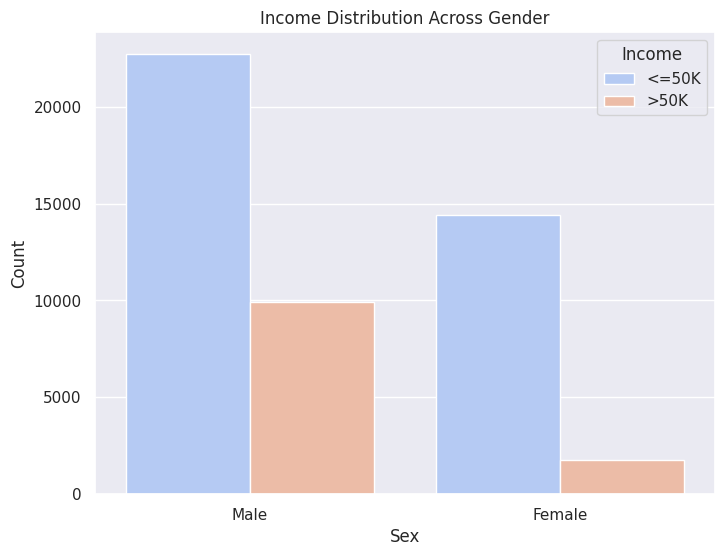

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='income', data=pd.concat([final_data['sex'], final_data['income']], axis=1), palette='coolwarm')
plt.title('Income Distribution Across Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()

Multivariate analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
final_data['income'] = le.fit_transform(final_data['income'])

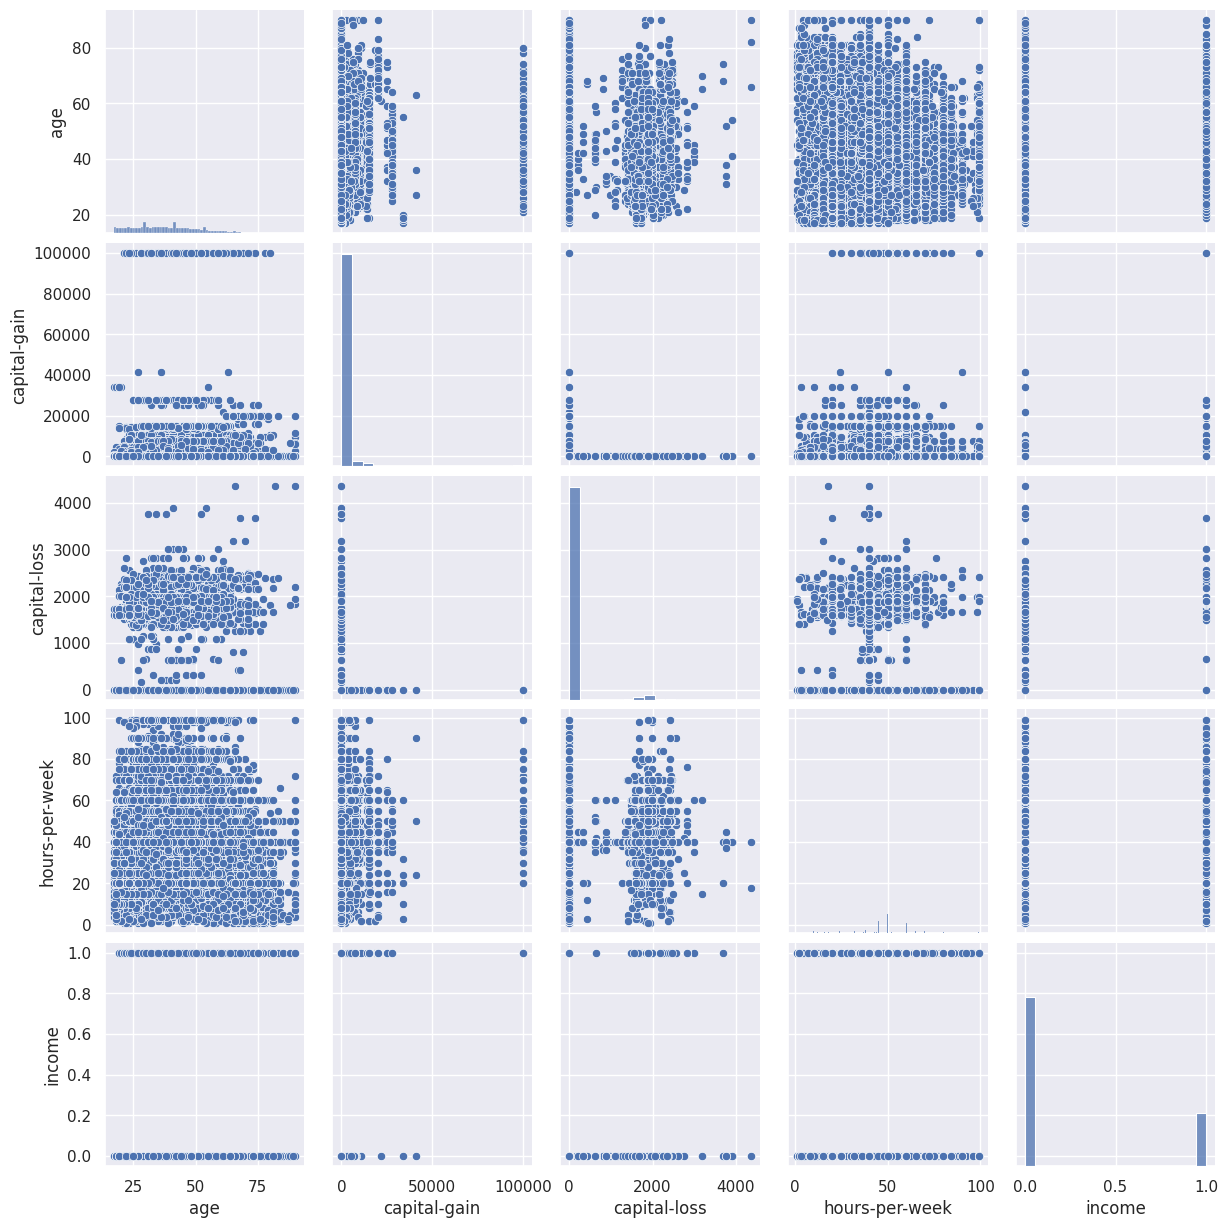

In [ ]:
sns.pairplot(final_data)
plt.show()

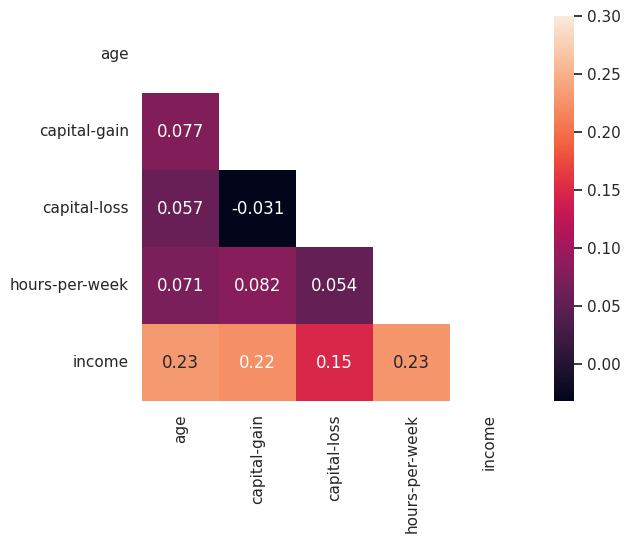

In [ ]:
corr = final_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='rocket')
plt.show()

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in final_data.columns:
    if final_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        final_data[col] = encoder.fit_transform(final_data[col])

Feature selection

In [ ]:
x = final_data.drop('income', axis=1)
y = final_data['income']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [ ]:
selector.fit(x, y)

ExtraTreesClassifier(random_state=42)

In [ ]:
feature_imp = selector.feature_importances_

In [ ]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 21.76
1 4.86
2 11.14
3 8.36
4 9.55
5 9.7
6 1.61
7 3.15
8 11.35
9 3.73
10 12.31
11 2.48


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48790 non-null  int64
 1   workclass       48790 non-null  int64
 2   education       48790 non-null  int64
 3   marital-status  48790 non-null  int64
 4   occupation      48790 non-null  int64
 5   relationship    48790 non-null  int64
 6   race            48790 non-null  int64
 7   sex             48790 non-null  int64
 8   capital-gain    48790 non-null  int64
 9   capital-loss    48790 non-null  int64
 10  hours-per-week  48790 non-null  int64
 11  native-country  48790 non-null  int64
dtypes: int64(12)
memory usage: 4.8 MB


In [ ]:
x = x.drop(['workclass', 'race', 'sex', 'capital-loss', 'native-country'], axis=1)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for col in x.columns:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))

Fixing imbalanced dataset using sampling

In [ ]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    76.06 %
1    23.94 %
Name: income, dtype: object

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
ros.fit(x, y)

RandomOverSampler(random_state=42)

In [ ]:
x_resampled, y_resampled = ros.fit_resample(x, y)

In [ ]:
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

Create a train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (59374, 7)
X_test shape: (14844, 7)
Y_train shape: (59374,)
Y_test shape: (14844,)


Data modelling

Naive bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(x_test)

Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [ ]:
ran_for.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_ran_for = ran_for.predict(x_test)

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
print("Naive Bayes Classifier: ")
print("Accuracy score: ", round(accuracy_score(y_test, y_pred_nb) * 100, 2))
print("F1 score: ", round(f1_score(y_test, y_pred_nb) * 100, 2))

Naive Bayes Classifier: 
Accuracy score:  60.07
F1 score:  37.13


In [ ]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 89.22
F1 score: 89.74


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

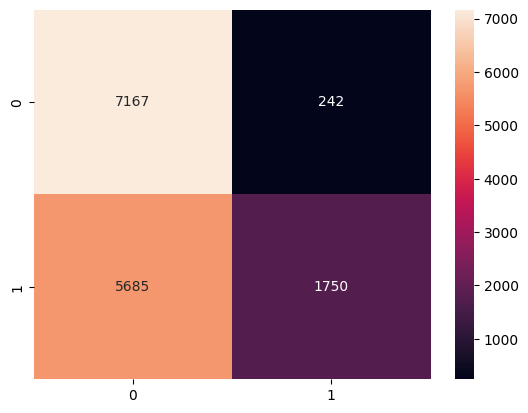

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')
plt.show()

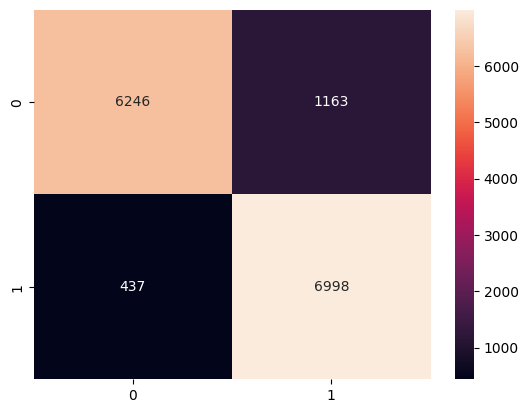

In [ ]:
cm = confusion_matrix(y_test, y_pred_ran_for)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.56      0.97      0.71      7409
           1       0.88      0.24      0.37      7435

    accuracy                           0.60     14844
   macro avg       0.72      0.60      0.54     14844
weighted avg       0.72      0.60      0.54     14844



In [ ]:
print(classification_report(y_test, y_pred_ran_for))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89      7409
           1       0.86      0.94      0.90      7435

    accuracy                           0.89     14844
   macro avg       0.90      0.89      0.89     14844
weighted avg       0.90      0.89      0.89     14844

